<a href="https://colab.research.google.com/github/Kesavika-abi/Data_Science/blob/main/BankPersonalLoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# 1.IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

In [30]:
# 2.LOAD DATASET
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling (1).csv")

In [31]:
# 3. DATA EXPLORATION
print("Shape:", df.shape)
print(df.info())
print(df.describe())

Shape: (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age  

In [32]:
# 4. PREPROCESSING
df = df.drop(columns=["ID", "ZIP Code"])
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# 5. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [34]:
# 6. TRAIN MODELS
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n🔍 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


🔍 Logistic Regression Evaluation
Accuracy: 0.952
Precision: 0.8455284552845529
Recall: 0.6624203821656051
F1 Score: 0.7428571428571429
ROC-AUC: 0.9666684056513841


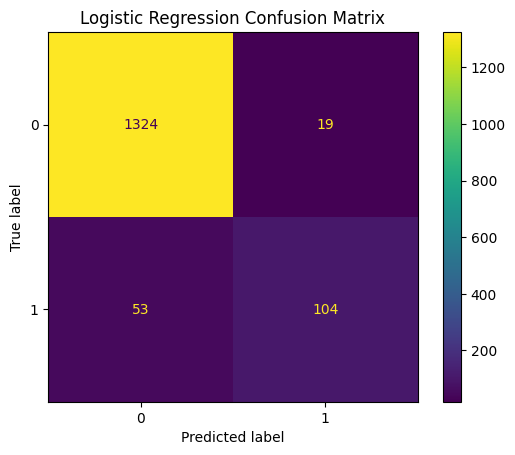


🔍 Random Forest Evaluation
Accuracy: 0.99
Precision: 0.9930555555555556
Recall: 0.910828025477707
F1 Score: 0.9501661129568106
ROC-AUC: 0.9984017149551104


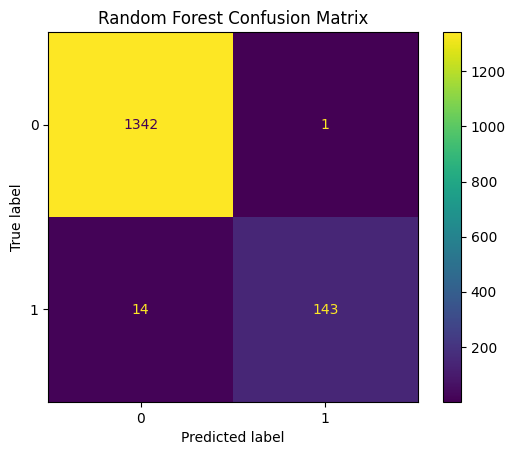

In [38]:
# 8. EVALUATE MODEL
evaluate_model(lr, "Logistic Regression")
evaluate_model(rf, "Random Forest")

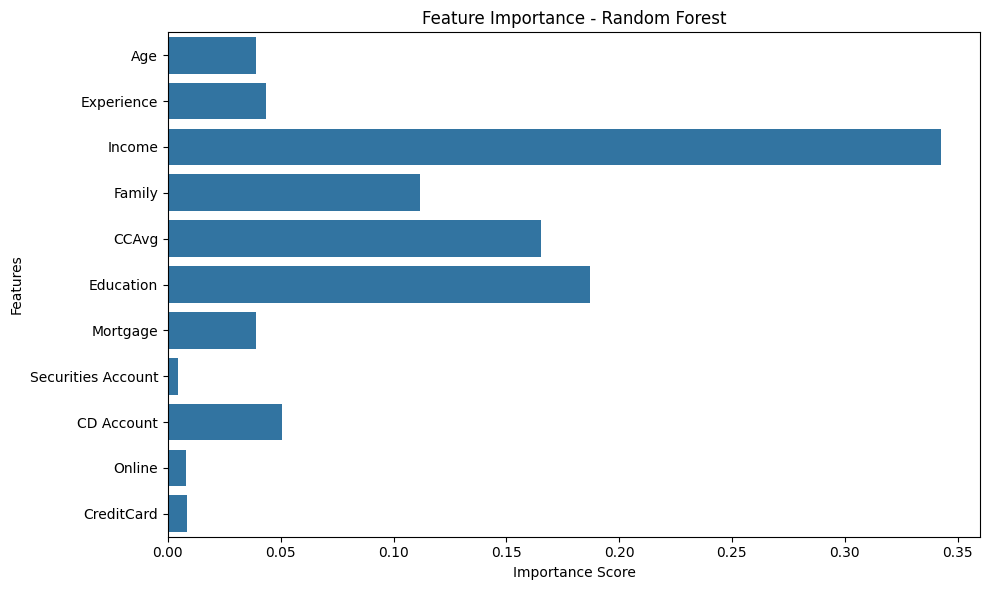

In [20]:
# 9. VISUALIZE FEATURE IMPORTANCE(RANDOM FOREST)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()